In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
file = '/content/loan_defaulter_pred.csv'
loan_data = pd.read_csv(file)

In [122]:
loan_data.shape

(887379, 30)

In [123]:
loan_data = loan_data.iloc[:1001,:]

In [124]:
loan_data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
id,1077501,1077430,1077175,1076863,1075358,1075269,1069639,1072053,1071795,1071570
year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
issue_d,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011,01/12/2011
final_d,1012015,1042013,1062014,1012015,1012016,1012015,1012016,1012015,1042012,1112012
emp_length_int,10,0.5,10,10,1,3,8,9,4,0.5
home_ownership,RENT,RENT,RENT,RENT,RENT,RENT,RENT,RENT,OWN,RENT
home_ownership_cat,1,1,1,1,1,1,1,1,2,1
income_category,Low,Low,Low,Low,Low,Low,Low,Low,Low,Low
annual_inc,24000,30000,12252,49200,80000,36000,47004,48000,40000,15000
income_cat,1,1,1,1,1,1,1,1,1,1


In [125]:
data = loan_data.drop(columns = ['final_d','year','recoveries','id','home_ownership','income_category','application_type','application_type_cat','interest_payments','loan_condition','grade','region','issue_d','purpose','term'])

In [126]:
data.head().transpose()

,0,1,2,3,4
emp_length_int,10.000000,0.50,10.000000,10.00000,1.00
home_ownership_cat,1.000000,1.00,1.000000,1.00000,1.00
annual_inc,24000.000000,30000.00,12252.000000,49200.00000,80000.00
income_cat,1.000000,1.00,1.000000,1.00000,1.00
loan_amount,5000.000000,2500.00,2400.000000,10000.00000,3000.00
term_cat,1.000000,2.00,1.000000,1.00000,2.00
purpose_cat,1.000000,2.00,3.000000,4.00000,4.00
interest_payment_cat,1.000000,2.00,2.000000,2.00000,1.00
loan_condition_cat,0.000000,1.00,0.000000,0.00000,0.00
interest_rate,10.650000,15.27,15.960000,13.49000,12.69


In [127]:
data.dtypes

emp_length_int          float64
home_ownership_cat        int64
annual_inc                int64
income_cat                int64
loan_amount               int64
term_cat                  int64
purpose_cat               int64
interest_payment_cat      int64
loan_condition_cat        int64
interest_rate           float64
grade_cat                 int64
dti                     float64
total_pymnt             float64
total_rec_prncp         float64
installment             float64
dtype: object

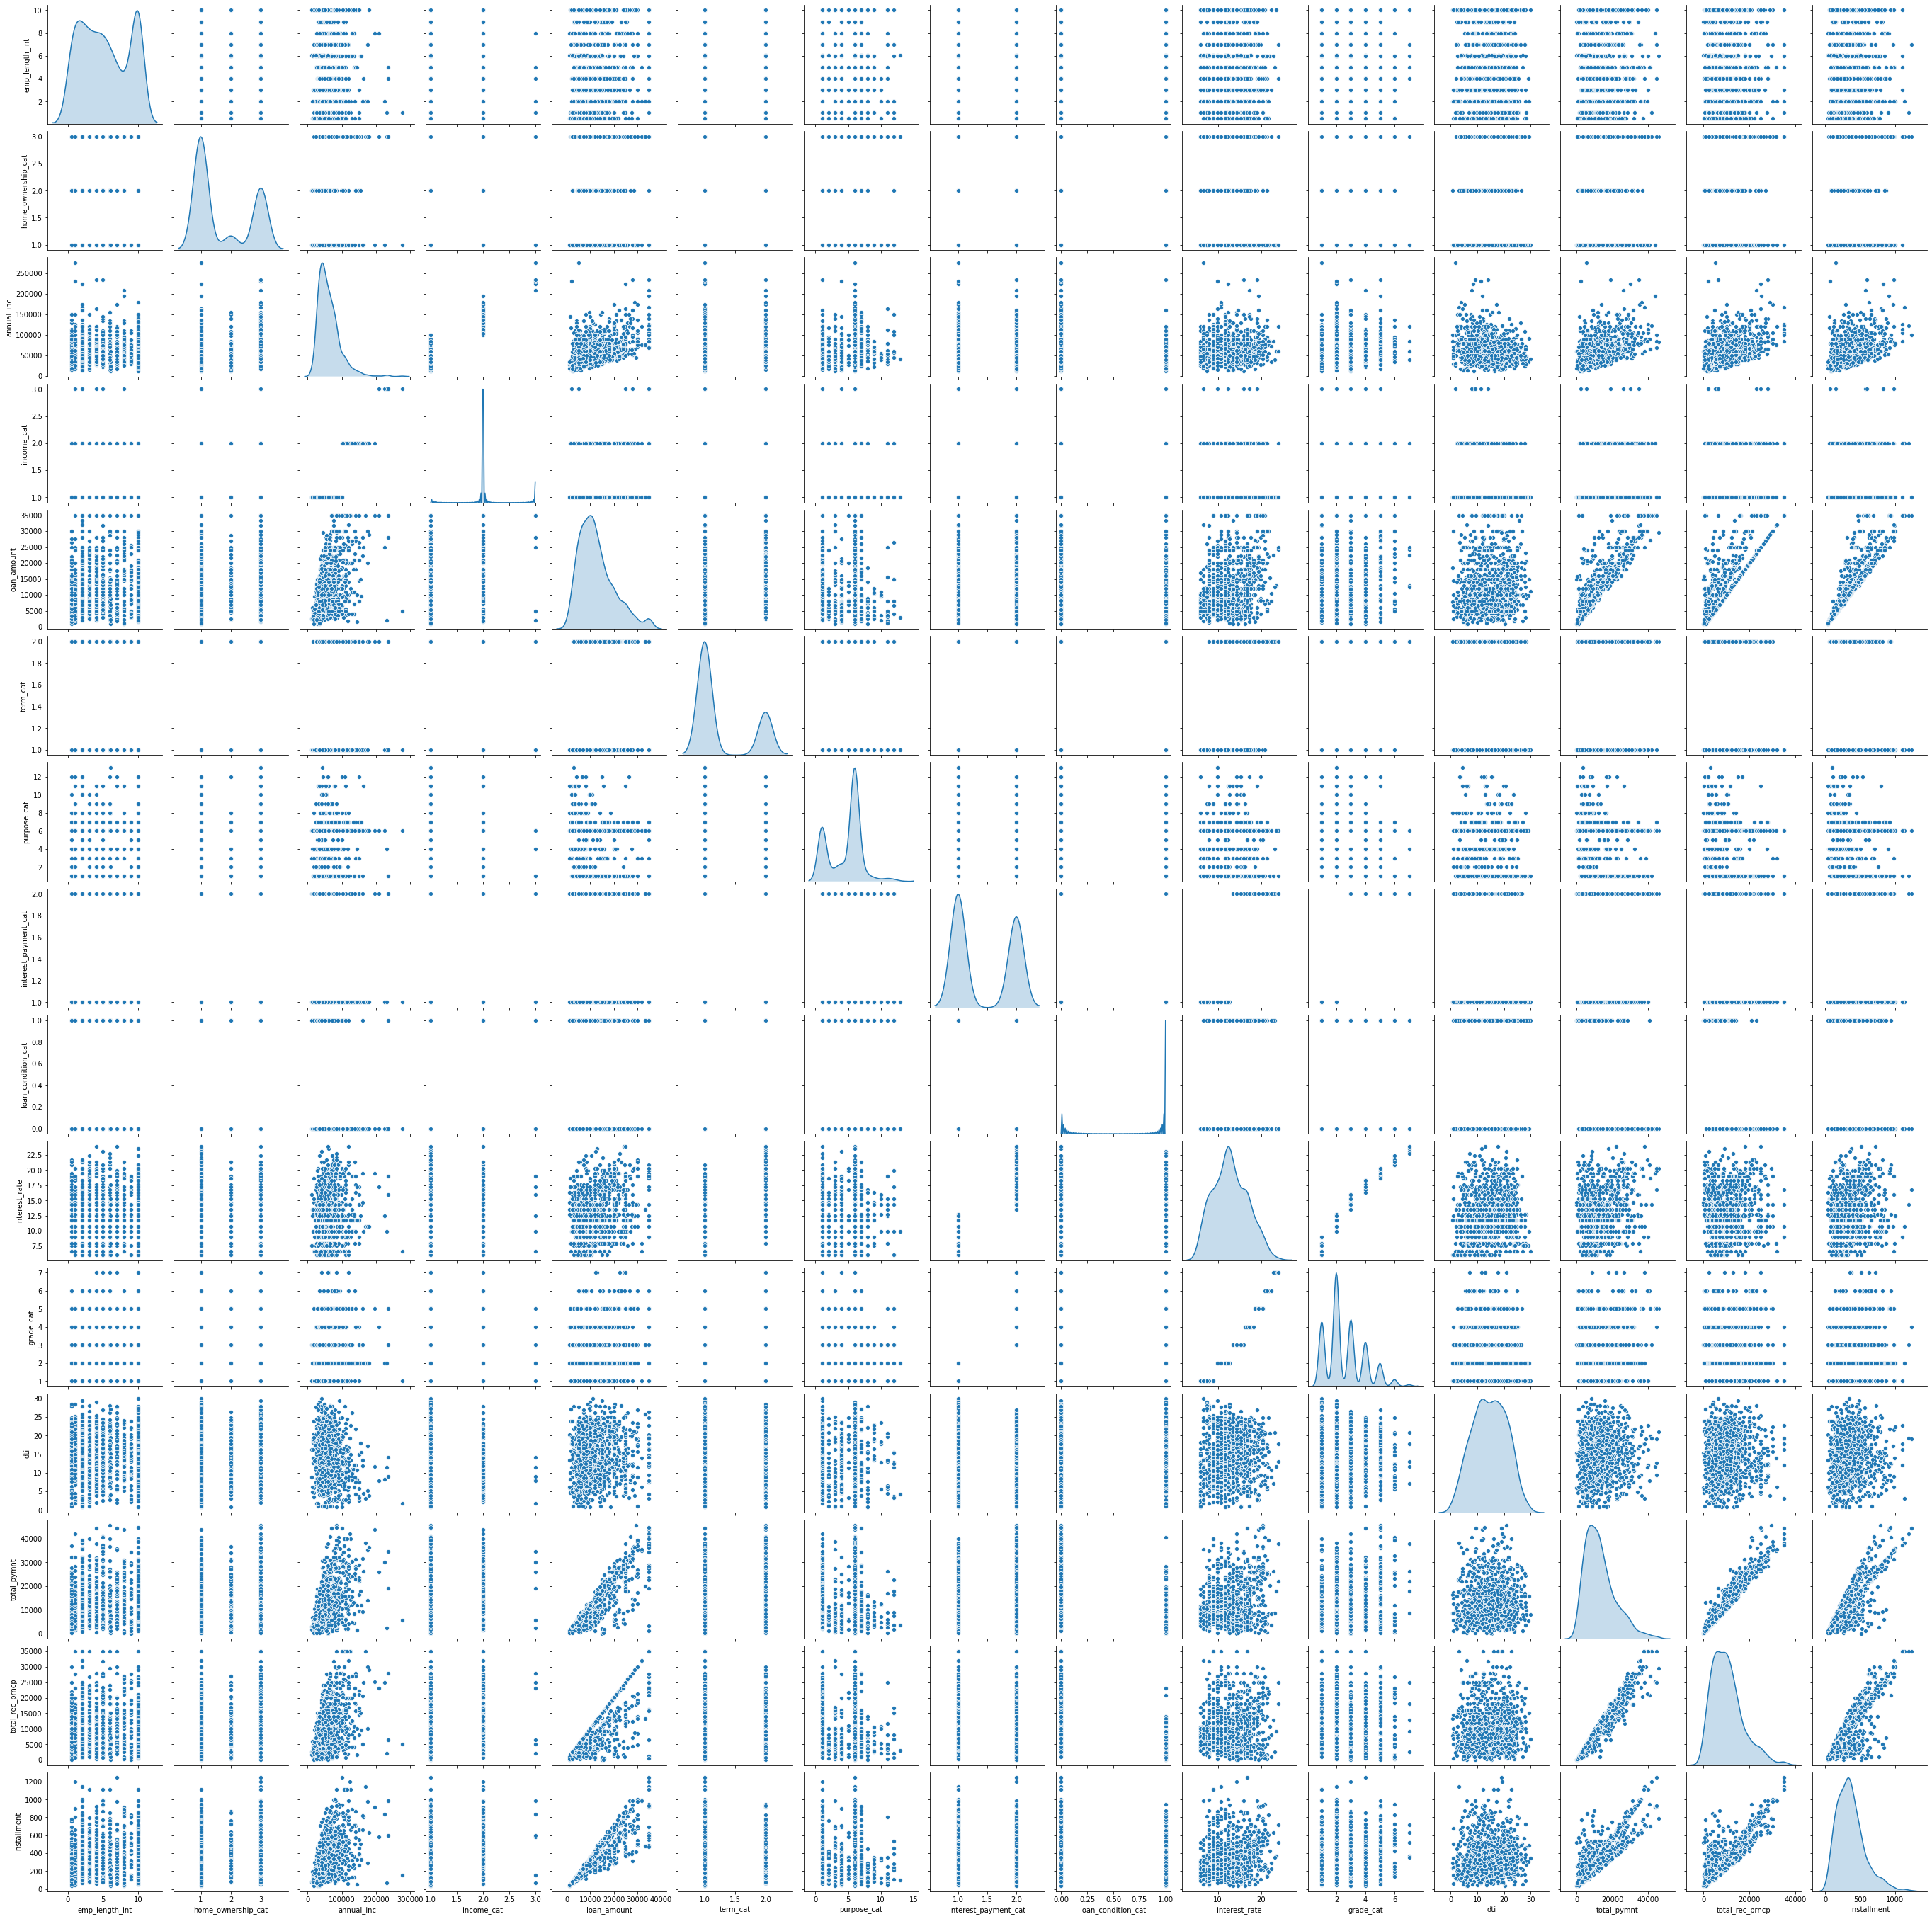

In [128]:
sns.pairplot(data,diag_kind = 'kde')

In [129]:
data[data.isna().any(axis = 1)].count()

emp_length_int          0
home_ownership_cat      0
annual_inc              0
income_cat              0
loan_amount             0
term_cat                0
purpose_cat             0
interest_payment_cat    0
loan_condition_cat      0
interest_rate           0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
installment             0
dtype: int64

In [130]:
y = data.pop('loan_condition_cat')
x = data

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 100)

In [133]:
model_log = LogisticRegression(max_iter=10000)

In [134]:
model_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
y_pred = model_log.predict(x_test)

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
score = accuracy_score(y_test,y_pred)
score

0.9900332225913622

In [138]:
from sklearn.metrics import f1_score

In [139]:
f1_score(y_test,y_pred,average = None)

array([0.99405941, 0.96907216])